In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-clean/retail_clean.csv


In [2]:
! pip install inventorize

  Created wheel for inventorize: filename=inventorize-0.0.8-py3-none-any.whl size=15621 sha256=6040d7df0ab7effd7d9b02ad8f3c62a7d409a3509e33002634d09ee77e0da526
  Stored in directory: /root/.cache/pip/wheels/bd/52/8e/9f2ffa0f48556e99f5b527da3b111810a19fcdfadfb17bb37d
Successfully built inventorize


In [3]:
from sklearn.linear_model import LinearRegression
import inventorize as inv

In [4]:
## creating list of price and demand
price =[5,10,15,17,20,23,25]
demand =[600,550,700,680,500,400,250]

In [5]:
## creating df
pricing_data = pd.DataFrame({"price":price,"demand":demand})

In [6]:
import matplotlib.pyplot as plt

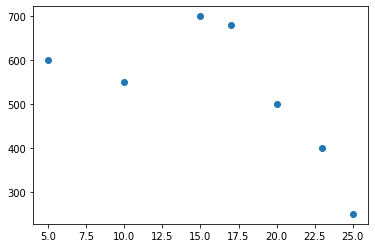

In [7]:
## visulaizing the fit
plt.scatter(price, demand)

#### the plot shows that this is not a best fit, it is representing more of a sigmoid, perhaps if we try logistic regression we may get the best fit.

In [8]:
### comparing the logit function with linear.

logit_linear=inv.single_product_optimization(price, demand,"Juice", 20, 4)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [9]:
logit_linear

{'optimization_paremeters':  final_simplex: (array([[-4.76292472e+00,  2.29095916e-01,  5.07841645e+02],
        [-4.76292471e+00,  2.29095915e-01,  5.07841645e+02],
        [-4.76292466e+00,  2.29095913e-01,  5.07841645e+02],
        [-4.76292469e+00,  2.29095914e-01,  5.07841645e+02]]), array([10993.65115399, 10993.65115399, 10993.65115399, 10993.65115399]))
            fun: 10993.651153985002
        message: 'Optimization terminated successfully.'
           nfev: 267
            nit: 149
         status: 0
        success: True
              x: array([-4.76292472e+00,  2.29095916e-01,  5.07841645e+02]),
 'lm_model': LinearRegression(),
 'squared_error_logit': 'squared_error_logit= 10993.651153985002',
 'squared_error_linear': 'squared_errorr_lm= 87654.04515522107',
 'simulation_data':             x  predicted_linear  predicted_logit  revenue_linear  \
 0   -7.806472        880.576416       512.608727    -6874.194763   
 1   -6.806472        865.933895       513.630096    -5893.954

### The sqr_err for logit is 10993 and that of linear is 87654, therefore logit model seems to be the best fit.

In [10]:
type(logit_linear)

dict

In [11]:
logit_linear.keys()

dict_keys(['optimization_paremeters', 'lm_model', 'squared_error_logit', 'squared_error_linear', 'simulation_data', 'best_model', 'optimum_linear', 'optimum_logit', 'current_price', 'article_name', 'predictions', 'point_of_maximum_profits'])

In [12]:
prediction_data=logit_linear['predictions']

In [13]:
prediction_data

,x,y,lm_p,logit_p
0,5,600,693.057385,558.225194
1,10,550,619.844779,615.604567
2,15,700,546.632173,670.744617
3,17,680,517.347131,656.449371
4,20,500,473.419567,551.424175
5,23,400,429.492004,370.288847
6,25,250,400.206961,252.617168


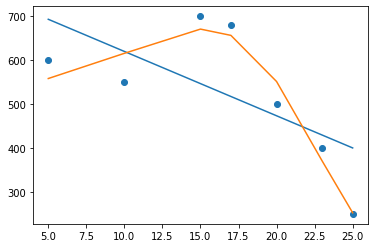

In [14]:
plt.scatter(prediction_data.x, prediction_data.y)
plt.plot(prediction_data.x, prediction_data.lm_p)
plt.plot(prediction_data.x, prediction_data.logit_p)

#### We can see that that the logit model is the better fit than linera, lets take a look at the point of max.profit

In [15]:
logit_linear['point_of_maximum_profits']

{'linear': array([28.19352842]), 'logit': array([19.19352842])}

#### differnce between the cost is more as it can make or break the revenue.

In [16]:
retail_cln= pd.read_csv("../input/retail-clean/retail_clean.csv") 

In [17]:
retail_cln['InvoiceDate']=pd.to_datetime(retail_cln['InvoiceDate'])

In [18]:
retail_cln['year']=retail_cln['InvoiceDate'].dt.year
retail_cln['week']=retail_cln['InvoiceDate'].dt.week

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [19]:
## getting week_year component
retail_cln['week_year']=retail_cln['InvoiceDate'].dt.strftime("%W %Y")

In [20]:
weekly_sales=retail_cln.groupby(["Description","week_year"]).agg(total_sales= ("Quantity","sum"),
                                                  price= ("Price","mean")).reset_index()

In [21]:
### creating a key for unique skus

keys = weekly_sales.Description.unique()

In [22]:
## create empty dict

empty_dict_logit= {}

for key in keys:
        a = weekly_sales[weekly_sales.Description == key]
        cost = 0.4* max(a['price'])
        current_price = a['price'].mean()
        logit = inv.single_product_optimization(a['price'], a['total_sales'], key,current_price, cost)
        empty_dict_logit[key]= logit

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [23]:
empty_dict_logit

{'  DOORMAT UNION JACK GUNS AND ROSES': {'optimization_paremeters':  final_simplex: (array([[-339.56035195,   50.82505954,   27.66896126],
         [-339.56035244,   50.82505961,   27.66896126],
         [-339.56035258,   50.82505964,   27.66896126],
         [-339.56035227,   50.82505959,   27.66896127]]), array([1211.58929579, 1211.58929579, 1211.58929579, 1211.58929579]))
             fun: 1211.589295787227
         message: 'Optimization terminated successfully.'
            nfev: 645
             nit: 352
          status: 0
         success: True
               x: array([-339.56035195,   50.82505954,   27.66896126]),
  'lm_model': LinearRegression(),
  'squared_error_logit': 'squared_error_logit= 1211.589295787227',
  'squared_error_linear': 'squared_errorr_lm= 3621.9939513586464',
  'simulation_data':           x  predicted_linear  predicted_logit  revenue_linear  revenue_logit  \
  0  5.491434         19.297171        27.668961      105.969146     151.942281   
  1  6.491434   